In [9]:
# Lab Assignment 2: K-Nearest Neighbors vs Radius Neighbors
# Name: Nischal Joshi
# Course: MSCS 634 Advanced Data Mining and Big Data. 
# Lab Title: Classification with KNN and RNN using the Wine Dataset

In [3]:
# Importing the libraries for the task
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Loading the wine dataset from Sklearn
wine = load_wine()
X = wine.data
y = wine.target

# Convert to DataFrame for exploration
df = pd.DataFrame(X, columns= wine.feature_names)
df['target'] = y

# Basic Exploration
print("Dataset shape:", df.shape)
print("\nClass Distribution:")
print(df['target'].value_counts())
df.head()

Dataset shape: (178, 14)

Class Distribution:
target
1    71
0    59
2    48
Name: count, dtype: int64


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [5]:
## Spliting the data as Train-test(80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Utilizing feature scaling.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("train test Completed");

train test Completed


In [7]:
#Implementing K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k_values = [1, 5, 11, 15, 21]
knn_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    knn_accuracies.append(acc)
    print(f"K={k}, Accuracy={acc:.4f}")

K=1, Accuracy=0.9444
K=5, Accuracy=0.9444
K=11, Accuracy=0.9444
K=15, Accuracy=0.9722
K=21, Accuracy=0.9444


In [9]:
from sklearn.neighbors import RadiusNeighborsClassifier

r_values = [350, 400, 450, 500, 550, 600]
rnn_accuracies = []

for r in r_values:
    rnn = RadiusNeighborsClassifier(radius=r)
    try:
        rnn.fit(X_train_scaled, y_train)
        y_pred = rnn.predict(X_test_scaled)
        acc = accuracy_score(y_test, y_pred)
    except ValueError:
        acc = 0  # RNN fails where no neighbor is in the re
    rnn_accuracies.append(acc)
    print(f"Radius={r}, Accuracy={acc:.4f}")


Radius=350, Accuracy=0.3889
Radius=400, Accuracy=0.3889
Radius=450, Accuracy=0.3889
Radius=500, Accuracy=0.3889
Radius=550, Accuracy=0.3889
Radius=600, Accuracy=0.3889


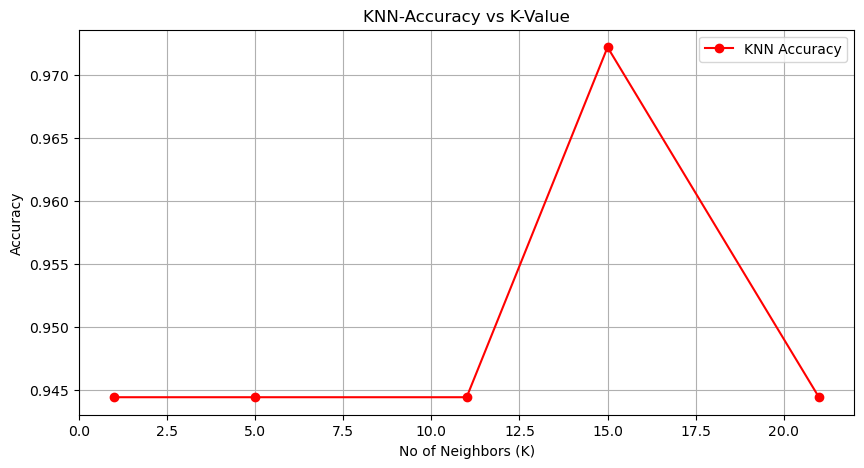

In [11]:
#Ploting for KNN
plt.figure(figsize=(10, 5))
plt.plot(k_values, knn_accuracies, marker='o', color='red', label='KNN Accuracy')
plt.title('KNN-Accuracy vs K-Value')
plt.xlabel('No of Neighbors (K)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

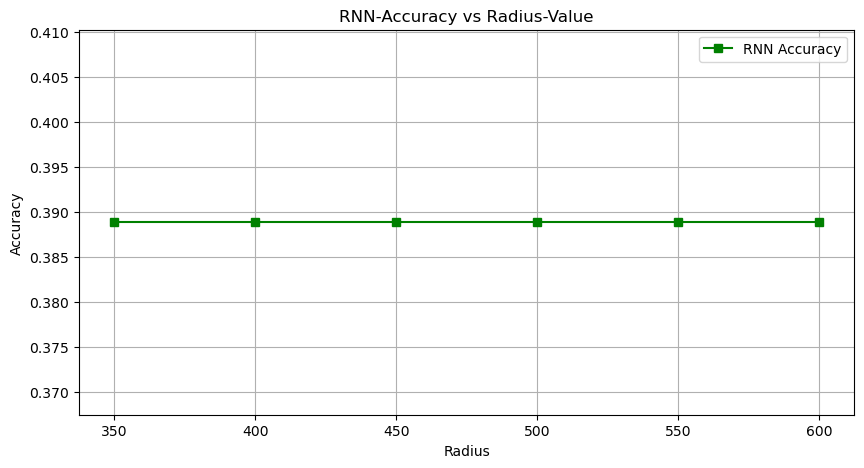

In [13]:
# Plotting for RNN
plt.figure(figsize=(10, 5))
plt.plot(r_values, rnn_accuracies, marker='s', color='green', label='RNN Accuracy')
plt.title('RNN-Accuracy vs Radius-Value')
plt.xlabel('Radius')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

In [15]:
# Analysis and Observations

# Performance Summary
# KNN Results Analysis
best_knn_idx = np.argmax(knn_accuracies)
worst_knn_idx = np.argmin(knn_accuracies)

print("KNN Performance Analysis:")
print(f" Best Performance: K={k_values[best_knn_idx]}, Accuracy={knn_accuracies[best_knn_idx]:.4f}")
print(f" Worst Performance: K={k_values[worst_knn_idx]}, Accuracy={knn_accuracies[worst_knn_idx]:.4f}")
print(f" Performance Range: {max(knn_accuracies) - min(knn_accuracies):.4f}")
print(f" Average Accuracy: {np.mean(knn_accuracies):.4f}")

# RNN Results Analysis
valid_rnn_accuracies = [acc for acc in rnn_accuracies if acc > 0]
failed_predictions = rnn_accuracies.count(0)

if valid_rnn_accuracies:
    best_rnn_idx = rnn_accuracies.index(max(valid_rnn_accuracies))
    print(f"\nRNN Performance Analysis:")
    print(f" Best Performance: Radius={r_values[best_rnn_idx]}, Accuracy={max(valid_rnn_accuracies):.4f}")
    print(f" Failed Predictions: {failed_predictions}/{len(r_values)} radius values")
    print(f" Success Rate: {len(valid_rnn_accuracies)}/{len(r_values)} ({len(valid_rnn_accuracies)/len(r_values)*100:.1f}%)")
    if len(valid_rnn_accuracies) > 1:
        print(f" Performance Range (valid): {max(valid_rnn_accuracies) - min(valid_rnn_accuracies):.4f}")
    print(f" Average Accuracy (valid only): {np.mean(valid_rnn_accuracies):.4f}")
else:
    print(f"\nRNN Performance Analysis:")
    print(f" All radius values failed to make predictions")



KNN Performance Analysis:
 Best Performance: K=15, Accuracy=0.9722
 Worst Performance: K=1, Accuracy=0.9444
 Performance Range: 0.0278
 Average Accuracy: 0.9500

RNN Performance Analysis:
 Best Performance: Radius=350, Accuracy=0.3889
 Failed Predictions: 0/6 radius values
 Success Rate: 6/6 (100.0%)
 Performance Range (valid): 0.0000
 Average Accuracy (valid only): 0.3889


In [17]:
#Parameter Sensitivity Analysis
# KNN Sensitivity
knn_std = np.std(knn_accuracies)
print(f" KNN Parameter Sensitivity:")
print(f" Standard Deviation: {knn_std:.4f}")
print(f" Coefficient of Variation: {knn_std/np.mean(knn_accuracies)*100:.2f}%")
if knn_std < 0.05:
    knn_sensitivity = "Low"
elif knn_std < 0.1:
    knn_sensitivity = "Moderate"
else:
    knn_sensitivity = "High"
print(f" Sensitivity Level: {knn_sensitivity}")

# RNN Sensitivity
if len(valid_rnn_accuracies) > 1:
    rnn_std = np.std(valid_rnn_accuracies)
    print(f"\nRNN Parameter Sensitivity:")
    print(f"Standard Deviation (valid): {rnn_std:.4f}")
    print(f"Coefficient of Variation: {rnn_std/np.mean(valid_rnn_accuracies)*100:.2f}%")
    print(f"Failure Rate: {failed_predictions/len(r_values)*100:.1f}%")
    rnn_sensitivity = "Very High (due to failures)"
else:
    rnn_sensitivity = "Extremely High (mostly failed)"

print(f" Sensitivity Level: {rnn_sensitivity}")

 KNN Parameter Sensitivity:
 Standard Deviation: 0.0111
 Coefficient of Variation: 1.17%
 Sensitivity Level: Low

RNN Parameter Sensitivity:
Standard Deviation (valid): 0.0000
Coefficient of Variation: 0.00%
Failure Rate: 0.0%
 Sensitivity Level: Very High (due to failures)
